In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import yaml


In [20]:
conf=[filename for filename in glob.iglob("Configs/*", recursive=True)]
conf

['Configs/amazon_config_lvl2_flat_flatt_bert-base-uncased.yaml',
 'Configs/dbpedia_config_lvl3_targets_flatt_bert-base-uncased.yaml',
 'Configs/amazon_config_lvl2_flat_target_bert-base-uncased.yaml',
 'Configs/dbpedia_config_lvl3_2_target_2_target_bert-base-uncased.yaml',
 'Configs/dbpedia_config_lvl3_targets_predicted_bert-base-uncased.yaml',
 'Configs/dbpedia_config_lvl2_h_t_target_bert-base-uncased.yaml',
 'Configs/dbpedia_config_lvl3_2_target_flatt_bert-base-uncased.yaml',
 'Configs/dbpedia_config_lvl2_flat_bert-base-uncased.yaml',
 'Configs/dbpedia_config_lvl2_h_p_bert-base-uncased.yaml',
 'Configs/dbpedia_config_lvl2_h_p_flatt_bert-base-uncased.yaml',
 'Configs/amazon_config_lvl2_h_p_bert-base-uncased.yaml',
 'Configs/dbpedia_config_lvl3_1_target_flatt_bert-base-uncased.yaml',
 'Configs/dbpedia_config_lvl1_bert-base-uncased.yaml',
 'Configs/amazon_config_lvl1_bert-base-uncased.yaml',
 'Configs/dbpedia_config_lvl2_h_t_bert-base-uncased.yaml',
 'Configs/amazon_config_lvl2_h_p_flatt

In [26]:
confs=['Configs/amazon_config_lvl2_flat_flatt_bert-base-uncased.yaml',
 'Configs/amazon_config_lvl2_flat_target_bert-base-uncased.yaml',
 'Configs/dbpedia_config_lvl2_h_t_target_bert-base-uncased.yaml',
 'Configs/dbpedia_config_lvl2_flat_bert-base-uncased.yaml',
 'Configs/dbpedia_config_lvl2_h_p_bert-base-uncased.yaml',
 'Configs/dbpedia_config_lvl2_h_p_flatt_bert-base-uncased.yaml',
 'Configs/amazon_config_lvl2_h_p_bert-base-uncased.yaml',
 'Configs/dbpedia_config_lvl1_bert-base-uncased.yaml',
 'Configs/amazon_config_lvl1_bert-base-uncased.yaml',
 'Configs/dbpedia_config_lvl2_h_t_bert-base-uncased.yaml',
 'Configs/amazon_config_lvl2_h_p_flatt_bert-base-uncased.yaml',
 'Configs/amazon_config_lvl2_h_p_Target_bert-base-uncased.yaml',
 'Configs/amazon_config_lvl2_h_t_bert-base-uncased.yaml',
 'Configs/dbpedia_config_lvl2_flat_flatt_bert-base-uncased.yaml',
 'Configs/amazon_config_lvl2_h_t_target_bert-base-uncased.yaml',
 'Configs/amazon_config_lvl2_h_t_flatt_bert-base-uncased.yaml',
 'Configs/dbpedia_config_lvl2_flat_target_bert-base-uncased.yaml',
 'Configs/dbpedia_config_lvl2_h_t_flatt_bert-base-uncased.yaml',
 'Configs/amazon_config_lvl2_flat_bert-base-uncased.yaml',
 'Configs/dbpedia_config_lvl2_h_p_Target_bert-base-uncased.yaml']
confs=conf

In [27]:
def get_data(config):
    print(config)
    with open(config) as f:
        arguments = yaml.load(f, Loader=yaml.FullLoader)
    # --------- Setup BERT ----------
    # Name of the BERT model to use
    model_name = arguments['model_name']
    # Max length of tokens
    max_length = arguments['max_length']
    epochs = arguments['epochs']
    batch_size = arguments['batch_size']
    lvl = arguments['lvl']
    hierar = arguments['hierar']
    lable_type = arguments['lable_type']
    test_labels_type = arguments['test_labels_type']
    data_path = arguments['data_path']

    # --------- Setup logs paths ----------
    path = "saved_data/" + model_name+ "/"+data_path + "/lvl" + str(lvl) + "/trained_" + hierar + "_" + lable_type + "tested_"+test_labels_type+"/" + str(max_length) + "T_" + str(epochs) + "e/"
    print(path)
    files=[filename for filename in glob.iglob(path+"/*/test_pred_raw.npz", recursive=True)]
    if files ==[]:
        print(files)

        return  model_name+ "/"+data_path + "/lvl" + str(lvl) + "/trained_" + hierar + "_" + lable_type + "tested_"+test_labels_type+"/" + str(max_length) + "T_" + str(epochs) + "e/", -1 ,-1 ,-1 ,-1 ,-1,-1,-1,-1, lvl
    accu_list=[]
    f1_score_list=[]
    for file in files:
        arr=np.load(file)
        accu_list.append(arr['accu_list'])
        f1_score_list.append(arr['f1_score_list'])
    std_f1=np.std(f1_score_list, axis=0)
    mean_f1=np.mean(f1_score_list, axis=0)
    max_f1=mean_f1+1.96*(std_f1/np.sqrt(len(mean_f1)+1))#np.max(f1_score_list, axis=0)
    min_f1=mean_f1-1.96*(std_f1/np.sqrt(len(mean_f1)+1))#np.min(f1_score_list, axis=0)

    std_acc=np.std(accu_list, axis=0)
    mean_acc=np.mean(accu_list, axis=0)
    max_accu=mean_acc+1.96*(std_acc/np.sqrt(len(mean_acc)+1))#np.max(accu_list, axis=0)
    min_accu=mean_acc-1.96*(std_acc/np.sqrt(len(mean_acc)+1))#np.min(accu_list, axis=0)
    title=files[0][29:-23]
    return title, mean_f1,std_f1,mean_acc,std_acc,max_f1,min_f1,max_accu,min_accu, lvl

In [28]:
reults=[get_data(filename) for filename in conf]
reults_plot=[x for x in reults if np.sum(np.shape([[x[2]]]))!=2]

Configs/amazon_config_lvl2_flat_flatt_bert-base-uncased.yaml
saved_data/bert-base-uncased/amazon/lvl2/trained_flatt__tested__/100T_40e/
Configs/dbpedia_config_lvl3_targets_flatt_bert-base-uncased.yaml
saved_data/bert-base-uncased/dbpedia/lvl3/trained_hierarchical_Targettested__/100T_40e/
[]
Configs/amazon_config_lvl2_flat_target_bert-base-uncased.yaml
saved_data/bert-base-uncased/amazon/lvl2/trained_flatt__tested_Target/100T_40e/
Configs/dbpedia_config_lvl3_2_target_2_target_bert-base-uncased.yaml
saved_data/bert-base-uncased/dbpedia/lvl3/trained_hierarchical_Targettested_Target/100T_40e/
[]
Configs/dbpedia_config_lvl3_targets_predicted_bert-base-uncased.yaml
saved_data/bert-base-uncased/dbpedia/lvl3/trained_hierarchical_Targettested_Target/100T_40e/
[]
Configs/dbpedia_config_lvl2_h_t_target_bert-base-uncased.yaml
saved_data/bert-base-uncased/dbpedia/lvl2/trained_hierarchical_Targettested_Target/100T_40e/
Configs/dbpedia_config_lvl3_2_target_flatt_bert-base-uncased.yaml
saved_data/bert

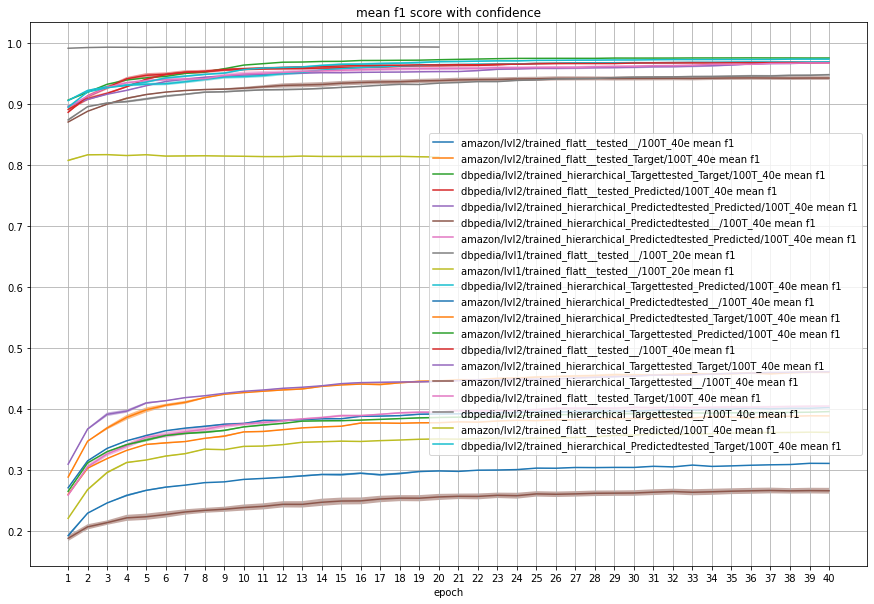

In [6]:
fig=plt.figure(figsize=(15,10))

max_len=0
for res in reults_plot:
    x=range(1,len(res[1])+1)
    if len(res[1]) > max_len:
        max_len=len(res[1])
    plt.plot(x,res[1], label="{} mean f1".format(res[0]))
    plt.fill_between(x, res[5], res[6], alpha=0.5) #res[1]-res[2], res[1]+res[2], alpha=0.5)
plt.xlabel("epoch")
plt.legend()
plt.grid()
plt.xticks(range(1,max_len+1))
plt.title("mean f1 score with confidence")
plt.savefig('./visualizations/f1_graph.png', dpi=fig.dpi)

plt.show()

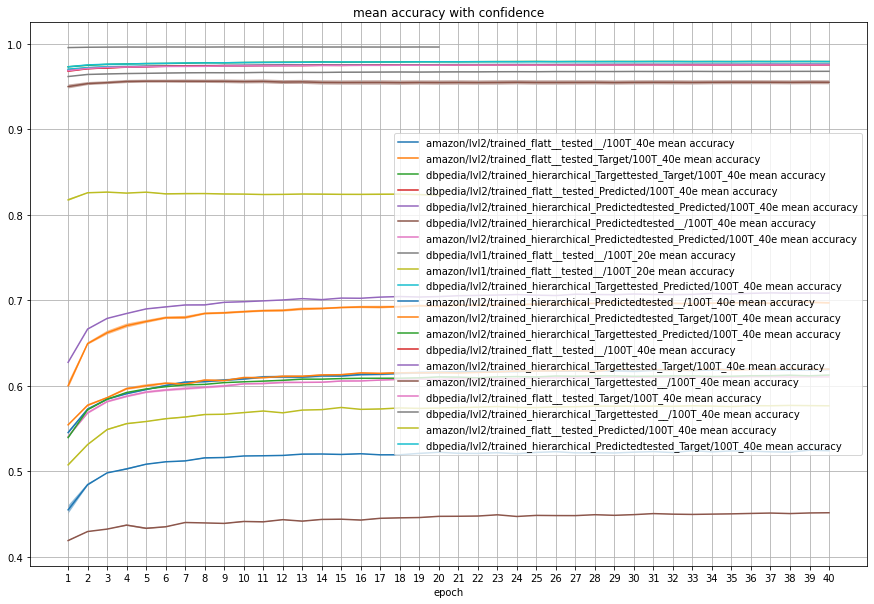

In [7]:
plt.figure(figsize=(15,10))

max_len=0
for res in reults_plot:
    x=range(1,len(res[1])+1)
    if len(res[1]) > max_len:
        max_len=len(res[1])
    plt.plot(x,res[3], label="{} mean accuracy".format(res[0]))
    plt.fill_between(x, res[7], res[8], alpha=0.5)#res[3]-res[4], res[3]+res[4], alpha=0.5)
plt.xlabel("epoch")
plt.legend()
plt.grid()
plt.xticks(range(1,max_len+1))
plt.title("mean accuracy with confidence")
plt.savefig('./visualizations/accu_graph.png', dpi=fig.dpi)

plt.show()

In [88]:
def make_table(config):
    with open(config) as f:
        arguments = yaml.load(f, Loader=yaml.FullLoader)
    # --------- Setup BERT ----------
    # Name of the BERT model to use
    model_name = arguments['model_name']
    # Max length of tokens
    max_length = arguments['max_length']
    dataset = arguments['data_path']
    runs= arguments['repetitions']
    epochs = arguments['epochs']
    batch_size = arguments['batch_size']
    lvl = arguments['lvl']
    hierar = arguments['hierar']
    lable_type = arguments['lable_type']
    test_labels_type = arguments['test_labels_type']
    labels = arguments['labels']
    test_labels = arguments['test_labels']
    # --------- Setup logs paths ----------
    if lable_type !='_':
        if lable_type == "Target":
            lable_type+=" "+' '.join(labels[0][1:])+", Text"
        else:
            lable_type+=" "+' '.join(["Cat"+str(i+1) for i in range(len(labels[0]))])+", Text"
    else:
        lable_type="Text"
    
    if test_labels_type !='_':
        if test_labels_type == "Target":
            test_labels_type+=" "+' '.join(test_labels[0][1:])+", Text"
        else:
            test_labels_type+=" "+' '.join(["Cat"+str(i+1) for i in range(len(test_labels[0]))])+", Text"
    else:
        test_labels_type="Text"
    
        
    return config[8:-5],dataset,epochs,max_length,runs,lable_type,"Cat"+str(lvl),test_labels_type 

In [91]:
results=[make_table(filename) for filename in confs]
scores=[[np.max(res[1]), np.max(res[3]), res[-1]] for res in reults]# f1 , accu
data=[]
for sc in scores:
    aux=['-']*6
    aux[(sc[2]-1)*2]=np.round(sc[1],4)
    aux[(sc[2]-1)*2+1]=np.round(sc[0], 4)
    data.append(aux)


In [96]:
df=pd.DataFrame(np.hstack((results,data)), columns=["Config", "Dataset", "Epochs", "Tokens", "Runs", "Train Input", "Output", "Test Input", "Cat1 accuracy", "Cat1 F1 score macro", "Cat2 accuracy", "Cat2 F1 score macro", "Cat3 accuracy", "Cat3 F1 score macro"])
#df=df.sort_values(by=['Config',"Output","Test Input" ])
df=df.sort_values(by=['Dataset','Output',"Train Input","Test Input" ], ascending=[True,True,False,False])

df=df.replace("-1","-")
df

,Config,Dataset,Epochs,Tokens,Runs,Train Input,Output,Test Input,Cat1 accuracy,Cat1 F1 score macro,Cat2 accuracy,Cat2 F1 score macro,Cat3 accuracy,Cat3 F1 score macro
13,amazon_config_lvl1_bert-base-uncased,amazon,20,100,2,Text,Cat1,Text,0.8264,0.8175,-,-,-,-
0,amazon_config_lvl2_flat_flatt_bert-base-uncased,amazon,40,100,2,Text,Cat2,Text,-,-,0.6198,0.4025,-,-
2,amazon_config_lvl2_flat_target_bert-base-uncased,amazon,40,100,2,Text,Cat2,"Target Cat1, Text",-,-,0.6202,0.389,-,-
26,amazon_config_lvl2_flat_bert-base-uncased,amazon,40,100,2,Text,Cat2,"Predicted Cat1, Text",-,-,0.5771,0.3621,-,-
20,amazon_config_lvl2_h_t_flatt_bert-base-uncased,amazon,40,100,2,"Target Cat1, Text",Cat2,Text,-,-,0.4516,0.2664,-,-
19,amazon_config_lvl2_h_t_target_bert-base-uncased,amazon,40,100,2,"Target Cat1, Text",Cat2,"Target Cat1, Text",-,-,0.7086,0.4612,-,-
17,amazon_config_lvl2_h_t_bert-base-uncased,amazon,40,100,2,"Target Cat1, Text",Cat2,"Predicted Cat1, Text",-,-,0.6126,0.3958,-,-
15,amazon_config_lvl2_h_p_flatt_bert-base-uncased,amazon,40,100,2,"Predicted Cat1, Text",Cat2,Text,-,-,0.5248,0.311,-,-
16,amazon_config_lvl2_h_p_Target_bert-base-uncased,amazon,40,100,2,"Predicted Cat1, Text",Cat2,"Target Cat1, Text",-,-,0.6978,0.4608,-,-
10,amazon_config_lvl2_h_p_bert-base-uncased,amazon,40,100,2,"Predicted Cat1, Text",Cat2,"Predicted Cat1, Text",-,-,0.6107,0.4049,-,-


In [97]:
print(df.to_markdown()) 


|    | Config                                                  | Dataset   |   Epochs |   Tokens |   Runs | Train Input            | Output   | Test Input                | Cat1 accuracy   | Cat1 F1 score macro   | Cat2 accuracy   | Cat2 F1 score macro   | Cat3 accuracy   | Cat3 F1 score macro   |
|---:|:--------------------------------------------------------|:----------|---------:|---------:|-------:|:-----------------------|:---------|:--------------------------|:----------------|:----------------------|:----------------|:----------------------|:----------------|:----------------------|
| 13 | amazon_config_lvl1_bert-base-uncased                    | amazon    |       20 |      100 |      2 | Text                   | Cat1     | Text                      | 0.8264          | 0.8175                | -               | -                     | -               | -                     |
|  0 | amazon_config_lvl2_flat_flatt_bert-base-uncased         | amazon    |       40 |      100 |      2 

In [99]:
aux=df[[ "Dataset", "Train Input", "Output", "Test Input"]]
aux=aux.reset_index()
aux

,index,Dataset,Train Input,Output,Test Input
0,13,amazon,Text,Cat1,Text
1,0,amazon,Text,Cat2,Text
2,2,amazon,Text,Cat2,"Target Cat1, Text"
3,26,amazon,Text,Cat2,"Predicted Cat1, Text"
4,20,amazon,"Target Cat1, Text",Cat2,Text
5,19,amazon,"Target Cat1, Text",Cat2,"Target Cat1, Text"
6,17,amazon,"Target Cat1, Text",Cat2,"Predicted Cat1, Text"
7,15,amazon,"Predicted Cat1, Text",Cat2,Text
8,16,amazon,"Predicted Cat1, Text",Cat2,"Target Cat1, Text"
9,10,amazon,"Predicted Cat1, Text",Cat2,"Predicted Cat1, Text"


In [100]:
print(aux.to_markdown()) 


|    |   index | Dataset   | Train Input            | Output   | Test Input                |
|---:|--------:|:----------|:-----------------------|:---------|:--------------------------|
|  0 |      13 | amazon    | Text                   | Cat1     | Text                      |
|  1 |       0 | amazon    | Text                   | Cat2     | Text                      |
|  2 |       2 | amazon    | Text                   | Cat2     | Target Cat1, Text         |
|  3 |      26 | amazon    | Text                   | Cat2     | Predicted Cat1, Text      |
|  4 |      20 | amazon    | Target Cat1, Text      | Cat2     | Text                      |
|  5 |      19 | amazon    | Target Cat1, Text      | Cat2     | Target Cat1, Text         |
|  6 |      17 | amazon    | Target Cat1, Text      | Cat2     | Predicted Cat1, Text      |
|  7 |      15 | amazon    | Predicted Cat1, Text   | Cat2     | Text                      |
|  8 |      16 | amazon    | Predicted Cat1, Text   | Cat2     | Targe